In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [48]:
# Data analysis and visulisation FIFA 21 Dataset 

# selects all the rows that will be needed from fifa21 dataset - uses the pandas library
fifa_data21 = pd.read_csv('Virtual_data/players_21.csv') 
fifa_data20 = pd.read_csv('Virtual_data/players_20.csv') 
fifa_data19 = pd.read_csv('Virtual_data/players_19.csv') 
fifa_data18 = pd.read_csv('Virtual_data/players_18.csv') 
fifa_data17 = pd.read_csv('Virtual_data/players_17.csv') 
fifa_data16 = pd.read_csv('Virtual_data/players_16.csv') 
fifa_data15 = pd.read_csv('Virtual_data/players_15.csv') 


 #selects data from all premier league teams - the league which we will be predicting
EPL21 = fifa_data21[(fifa_data21['league_name'] == 'English Premier League')]
EPL20 = fifa_data20[(fifa_data20['league_name'] == 'English Premier League')]
EPL19 = fifa_data19[(fifa_data19['league_name'] == 'English Premier League')]
EPL18 = fifa_data18[(fifa_data18['league_name'] == 'English Premier League')]
EPL17 = fifa_data17[(fifa_data17['league_name'] == 'English Premier League')]
EPL16 = fifa_data16[(fifa_data16['league_name'] == 'English Premier League')]
EPL15 = fifa_data15[(fifa_data15['league_name'] == 'English Premier League')]


<Figure size 432x288 with 0 Axes>

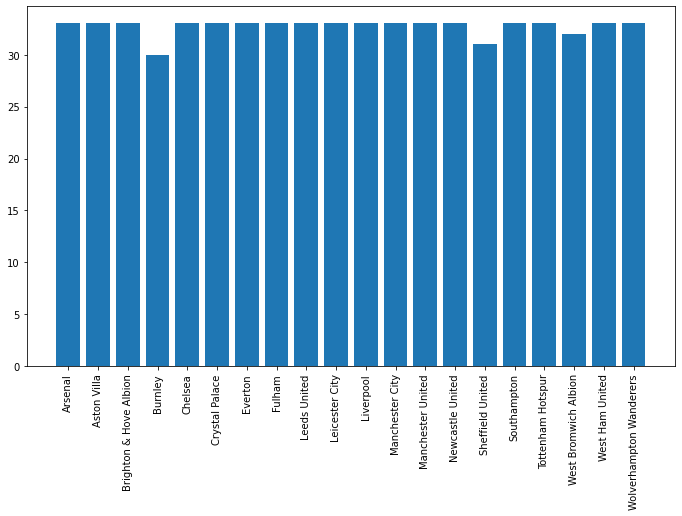

In [49]:
def get_squads(EPL):
    
    # gets the columns that we need
    use_cols=['short_name','club_name','overall','pace','shooting','passing','dribbling','passing','physic',
              'gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','player_traits',
              'attacking_crossing','attacking_finishing','attacking_heading_accuracy', 'attacking_short_passing',
              'attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing',
              'skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility',
              'movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina',
              'power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
              'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure',
              'defending_marking','defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving',
              'goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes',
              'league_name','value_eur','wage_eur','potential', 'player_positions','team_position']
    
    EPL = EPL[use_cols]
    # group the dataset by the club name
    EPL_grouped = EPL.groupby('club_name')
    EPL_squad = []

    for key, item in EPL_grouped:
            EPL_squad.append(item)
            EPL_squad = EPL_squad
    
    EPL_squad= pd.concat(EPL_squad)
    
    return EPL_squad

fifa21 = get_squads(EPL21)
fifa20 = get_squads(EPL20)
fifa19 = get_squads(EPL19)
fifa18 = get_squads(EPL18)
fifa17 = get_squads(EPL17)
fifa16 = get_squads(EPL16)
fifa15 = get_squads(EPL15)

# show number of players in each squad 
squad_size = []
for i, val in (fifa21.groupby(fifa21['club_name'])['short_name']).unique().iteritems():
    squad_size.append(len(val))
    squad_size = squad_size
squad_size
club_name = fifa21['club_name'].unique()

fig = plt.figure()
squad_size
fig = plt.figure(figsize=(9,5))
ax.set_ylim(ymin=25)
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(club_name,squad_size)
plt.show()


In [50]:
def remove_data(fifa):
    # make sure player just has one position
    fifa['player_positions'] = fifa['player_positions'].str.split(',').str[0]
    # remove players on the reserve list 
    fifa.drop(fifa[fifa.team_position == 'RES'].index, inplace=True)

    return fifa 

remove_data(fifa21)
remove_data(fifa20)
remove_data(fifa19)
remove_data(fifa18)
remove_data(fifa17)
remove_data(fifa16)
remove_data(fifa15)

,short_name,club_name,overall,pace,shooting,passing,dribbling,passing,physic,gk_diving,...,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,league_name,value_eur,wage_eur,potential,player_positions,team_position
27,M. Özil,Arsenal,86,74.0,74.0,86.0,87.0,86.0,58.0,NaN,...,14,10,6,14,English Premier League,44000000,190000,87,CAM,LW
47,A. Sánchez,Arsenal,84,88.0,81.0,75.0,87.0,75.0,66.0,NaN,...,10,15,12,13,English Premier League,26500000,170000,88,RW,RW
60,Santi Cazorla,Arsenal,84,73.0,78.0,85.0,87.0,85.0,61.0,NaN,...,9,5,7,15,English Premier League,20000000,150000,84,LM,SUB
71,A. Ramsey,Arsenal,83,71.0,78.0,79.0,80.0,79.0,77.0,NaN,...,11,5,10,8,English Premier League,15000000,130000,86,CM,RCM
80,P. Mertesacker,Arsenal,83,31.0,41.0,57.0,48.0,57.0,76.0,NaN,...,13,5,12,8,English Premier League,12500000,130000,83,CB,RCB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,A. Cresswell,West Ham United,70,81.0,55.0,68.0,69.0,68.0,62.0,NaN,...,6,8,8,11,English Premier League,1500000,20000,77,LB,LB
3015,D. Sakho,West Ham United,70,83.0,70.0,52.0,67.0,52.0,67.0,NaN,...,9,8,12,15,English Premier League,1900000,20000,74,ST,RS
3139,G. Demel,West Ham United,70,59.0,42.0,62.0,66.0,62.0,77.0,NaN,...,12,15,7,6,English Premier League,700000,15000,70,RB,RB
3277,J. O'Brien,West Ham United,70,64.0,46.0,62.0,64.0,62.0,72.0,NaN,...,6,7,7,9,English Premier League,1400000,25000,70,LB,SUB


In [51]:
def get_position(EPL):

    # create a defense, midfield and attack rating for each club
    # placeholder value
    # add new column to dataframe
    EPL['squad_position'] = EPL['player_positions'] 
    # stackoverflow (2019) https://stackoverflow.com/questions/58381980/pandas-search-for-dataframe-row-by-string-then-modify-without-header

    # Add whether the player is an attacker defender or midfielder
    Attack = 'ST', 'LW', 'RW', 'CF'
    squad_position = EPL.iloc[:,56].replace(to_replace=Attack, value='Attack', regex=False)
    EPL['squad_position'] = squad_position 

    Midfield = 'RM', 'CDM', 'CAM', 'LM', 'CM'
    squad_position = EPL.iloc[:,56].replace(to_replace=Midfield, value='Midfield', regex=False)
    EPL['squad_position'] = squad_position 

    Defense = 'CB','LB', 'RB','RWB','LWB'
    squad_position = EPL.iloc[:,56].replace(to_replace=Defense, value='Defense', regex=False)
    EPL['squad_position'] = squad_position 

    Defense = 'GK'
    squad_position = EPL.iloc[:,56].replace(to_replace=Defense, value='GK', regex=False)
    EPL['squad_position'] = squad_position 

    EPL = EPL
    
    return EPL

fifa21 = get_position(fifa21)
fifa20 = get_position(fifa20)
fifa19 = get_position(fifa19)
fifa18 = get_position(fifa18)
fifa17 = get_position(fifa17)
fifa16 = get_position(fifa16)
fifa15 = get_position(fifa15)
fifa17

,short_name,club_name,overall,pace,shooting,passing,dribbling,passing,physic,gk_diving,...,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,league_name,value_eur,wage_eur,potential,player_positions,team_position,squad_position
11,M. Özil,Arsenal,89,72.0,74.0,87.0,86.0,87.0,58.0,NaN,...,10,6,14,English Premier League,68500000,250000,90,CAM,CAM,Midfield
23,P. Čech,Arsenal,88,NaN,NaN,NaN,NaN,NaN,NaN,83.0,...,77,85,85,English Premier League,34000000,190000,88,GK,GK,GK
45,A. Sánchez,Arsenal,87,86.0,82.0,79.0,88.0,79.0,75.0,NaN,...,15,12,13,English Premier League,46500000,200000,87,LW,LM,Attack
51,Santi Cazorla,Arsenal,86,71.0,78.0,85.0,86.0,85.0,64.0,NaN,...,5,7,15,English Premier League,33500000,190000,86,CAM,RDM,Midfield
74,L. Koscielny,Arsenal,85,78.0,40.0,62.0,65.0,62.0,78.0,NaN,...,9,11,7,English Premier League,24000000,150000,85,CB,LCB,Defense
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,D. Randolph,West Ham United,74,NaN,NaN,NaN,NaN,NaN,NaN,76.0,...,74,71,77,English Premier League,2900000,60000,74,GK,SUB,GK
2661,S. Byram,West Ham United,73,78.0,61.0,66.0,73.0,66.0,72.0,NaN,...,15,16,13,English Premier League,3500000,60000,80,RB,RB,Defense
4674,E. Fernandes,West Ham United,70,79.0,65.0,66.0,70.0,66.0,64.0,NaN,...,13,15,13,English Premier League,2600000,50000,83,CAM,SUB,Midfield
8512,R. Oxford,West Ham United,66,71.0,33.0,50.0,53.0,50.0,67.0,NaN,...,7,9,14,English Premier League,1100000,10000,86,CB,SUB,Defense


Max player ratings by position player_positions
CAM    91
CB     90
CDM    89
CF     87
CM     88
GK     89
LB     85
LM     84
LW     88
LWB    79
RB     84
RM     83
RW     90
RWB    78
ST     89
Name: overall, dtype: int64

Min player ratings by position player_positions
CAM    62
CB     56
CDM    71
CF     67
CM     55
GK     66
LB     68
LM     68
LW     74
LWB    70
RB     69
RM     73
RW     72
RWB    68
ST     64
Name: overall, dtype: int64


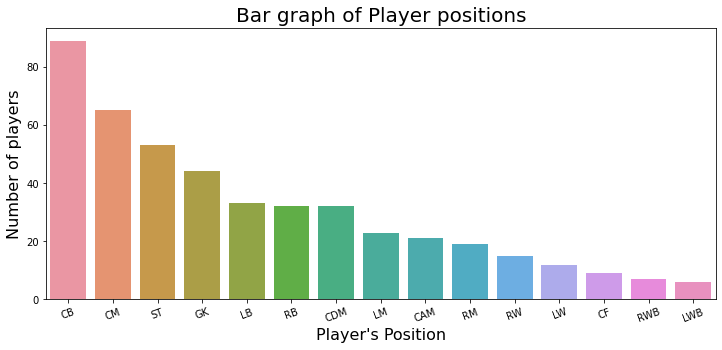

In [61]:
# Number of players in each position
pos_coun=fifa20.groupby('player_positions')['club_name'].count()
pos_coun=pos_coun.sort_values(ascending = False)
pos_coun=pd.DataFrame(pos_coun)
pos_coun

fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x = pos_coun.index, y = 'club_name', data = pos_coun)
plt.xticks(rotation=20)
ax.set_xlabel(xlabel="Player's Position", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Bar graph of Player positions', fontsize=20)

max_rating_pos = fifa20.groupby(fifa20['player_positions'])['overall'].max()
print('Max player ratings by position',max_rating_pos)
min_rating_pos = fifa20.groupby(fifa20['player_positions'])['overall'].min()
print('\nMin player ratings by position',min_rating_pos)

In [20]:
def get_ratings(fifa_data):

    defense = fifa_data[(fifa_data['squad_position'] == 'Defense')]
    midfield = fifa_data[(fifa_data['squad_position'] == 'Midfield')]
    attack = fifa_data[(fifa_data['squad_position'] == 'Attack')]
    goalkeeper = fifa_data[(fifa_data['squad_position'] == 'GK')]
    # create a ratings for team ratings
    team_ratings = pd.DataFrame(columns=('Team','Total_Rating','Goalkeeper', 'Defence','Midfield','Attack'))
    # add each club name to the table 
    club_name = fifa_data['club_name'].unique()

    team_ratings['Team'] = club_name

    player_features = ('overall')

    value = ('value_eur')
    wage = ('wage_eur')
    potential = ('potential')

    team_potential = []
    defense_rating = []
    midfield_rating = []
    attack_rating = []
    goalkeeper_rating = []
    overall_rating = []
    team_value = []
    team_wages = []

    #print('Average Defense Rating for every club\n')
    for i, val in defense.groupby(defense['club_name'])[player_features].mean().iteritems():
        #print('Team Name:',i, 'Average Defense Rating:',val,'\n')
        defense_rating.append(val)
    
    #print('Average Midfield Rating for every club\n')
    for i, val in midfield.groupby(midfield['club_name'])[player_features].mean().iteritems():
        #print('Team Name:',i, 'Average Midfield Rating:',val,'\n')
        midfield_rating.append(val)

    #print('Average Attack Rating for every club\n')    
    for i, val in attack.groupby(attack['club_name'])[player_features].mean().iteritems():
        #print('Team Name:',i, 'Average Attack Rating:',val,'\n')
        attack_rating.append(val)

    #print('Average Goalkeeper Rating for every club\n')    
    for i, val in goalkeeper.groupby(goalkeeper['club_name'])[player_features].mean().iteritems():
        #print('Team Name:',i, 'Average Goalkeeper Rating:',val,'\n')
        goalkeeper_rating.append(val)
    
    #print('Average Rating for every club\n')    
    for i, val in fifa_data.groupby(fifa_data['club_name'])[player_features].mean().iteritems():
        #print('Team Name:',i, 'Average Rating:',val,'\n')
        overall_rating.append(val)

    for i, val in fifa_data.groupby(fifa_data['club_name'])[value].mean().iteritems():
        #print('Team Name:',i, 'Average Rating:',val,'\n')
        team_value.append(val)
    
    for i, val in fifa_data.groupby(fifa_data['club_name'])[wage].mean().iteritems():
        #print('Team Name:',i, 'Average Rating:',val,'\n')
        team_wages.append(val)
    
    for i, val in fifa_data.groupby(fifa_data['club_name'])[potential].mean().iteritems():
        #print('Team Name:',i, 'Average Rating:',val,'\n')
        team_potential.append(val)
    
    team_ratings['team_potential'] = team_potential
    team_ratings['team_wage'] = team_wages
    team_ratings['team_value'] = team_value
    team_ratings['Total_Rating'] = overall_rating
    team_ratings['Goalkeeper'] = goalkeeper_rating
    team_ratings['Defence'] = defense_rating
    team_ratings['Midfield'] = midfield_rating
    team_ratings['Attack'] = attack_rating
    
    return team_ratings

# assign the dataframes to variables
player_ratings21 = get_ratings(fifa21)
player_ratings20 = get_ratings(fifa20)
player_ratings19 = get_ratings(fifa19)
player_ratings18 = get_ratings(fifa18)
player_ratings17 = get_ratings(fifa17)
player_ratings16 = get_ratings(fifa16)
player_ratings15 = get_ratings(fifa15)

# output as csv 
#player_ratings21.to_csv(r'/Users/oran/Desktop/project/player_ratings21.csv')
#player_ratings20.to_csv(r'/Users/oran/Desktop/project/player_ratings20.csv')
#player_ratings19.to_csv(r'/Users/oran/Desktop/project/player_ratings19.csv')
#player_ratings18.to_csv(r'/Users/oran/Desktop/project/player_ratings18.csv')
#player_ratings17.to_csv(r'/Users/oran/Desktop/project/player_ratings17.csv')
#player_ratings16.to_csv(r'/Users/oran/Desktop/project/player_ratings16.csv')
#player_ratings15.to_csv(r'/Users/oran/Desktop/project/player_ratings15.csv')

<AxesSubplot:xlabel='Defence', ylabel='Team'>

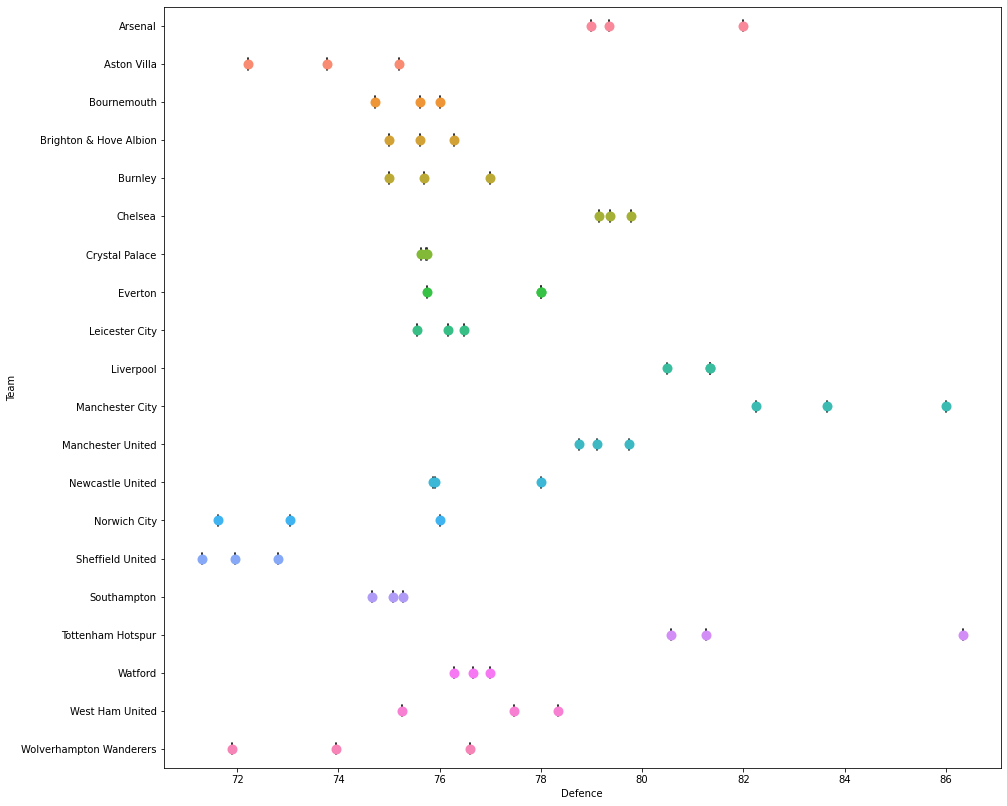

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

def make_swarmplot(df, xlabel, ylabel, ax, point_size =10, box_pal="Blues"):

    # make box plot for each category/club
    ax = sns.boxplot(y = ylabel, x = xlabel, data = df, ax= ax, palette=box_pal, width=0.3)
    
    # make swarm plot for each category/club
    ax = sns.swarmplot(y = ylabel, x = xlabel, data = df, size = point_size, ax = ax)
    
    # set size
    ax.figure.set_size_inches(15,14)
    
    # set labels
    ax.set_xlabel((xlabel.lower()).capitalize())
    ax.set_ylabel((ylabel.lower()).capitalize())
    ax.grid(False)
    
    return ax
ax_players = plt.subplot()

make_swarmplot(player_ratings20,"Total_Rating","Team",ax_players)
make_swarmplot(player_ratings20,"Attack","Team",ax_players)
make_swarmplot(player_ratings20,"Defence","Team",ax_players)


Bar Chart to show Teams Overall Rating


<Figure size 432x288 with 0 Axes>

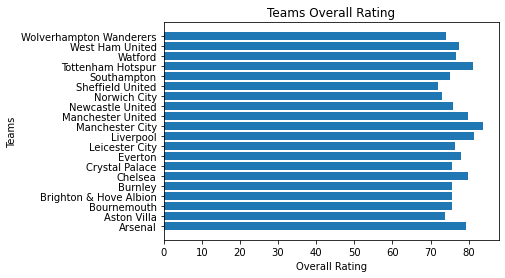

Bar Chart to show Teams Attack Rating


<Figure size 432x288 with 0 Axes>

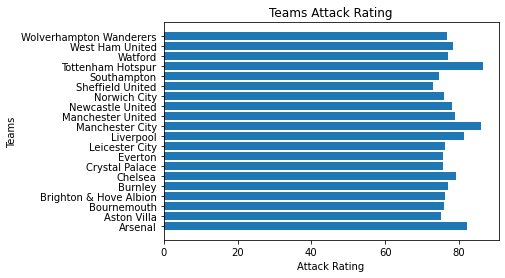

Bar Chart to show Teams Mean Wage


<Figure size 432x288 with 0 Axes>

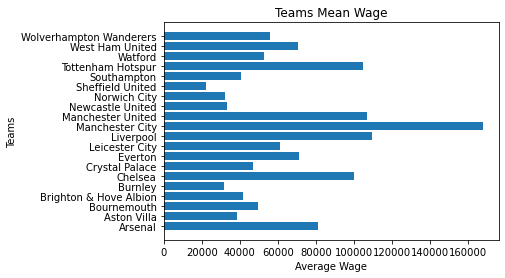

Bar Chart to show Teams Mean Value


<Figure size 432x288 with 0 Axes>

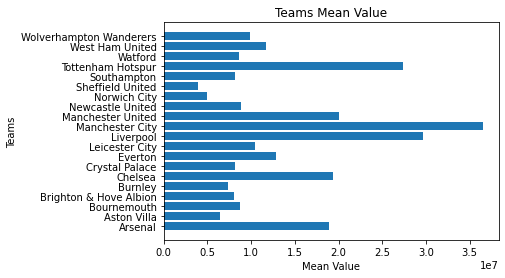

In [64]:
def makebar(y, xlabels, xlabel, ylabel, title):
    print('Bar Chart to show', title)
    plt.figure()
    bar_width = 0.40
    x = np.arange(len(y))
    fig, ax = plt.subplots()
    plt.barh(xlabels,y)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

makebar(player_ratings20['Total_Rating'], player_ratings20['Team'], 'Overall Rating', 'Teams', 
        'Teams Overall Rating')

makebar(player_ratings20['Attack'], player_ratings20['Team'], 'Attack Rating', 'Teams', 
        'Teams Attack Rating')

makebar(player_ratings20['team_wage'], player_ratings20['Team'], 'Average Wage', 'Teams', 
        'Teams Mean Wage')

makebar(player_ratings20['team_value'], player_ratings20['Team'], 'Mean Value', 'Teams', 
        'Teams Mean Value')

    
